<a href="https://colab.research.google.com/github/mutai-star/db_demo/blob/master/Copy_of_Blendin_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

find linear programming and optimal solution using python colab code on below problem                                                                 Blending problem. A coffee packer blends Brazilian coffee and Colombian coffee to prepare two
products: Super and Deluxe brands. Each kilogram of Super coffee contains 0.5 kg of Brazilian coffee
and 0.5 kg of Colombian coffee, whereas each kilogram of Deluxe coffee contains 0.25 kg of Brazilian
coffee and 0.75 kg of Colombian coffee. The packer has 120 kg of Brazilian coffee and 160 kg of
Colombian coffee on hand. If the profit on each kilogram of Super coffee is 20 cents and the profit

Presenters:
Muncihri Oscar
Kevin Mutai
Onkware Benard

Optimal Production:
Super blend: 200.00 kg
Deluxe blend: 80.00 kg
Maximum Profit: $60.00


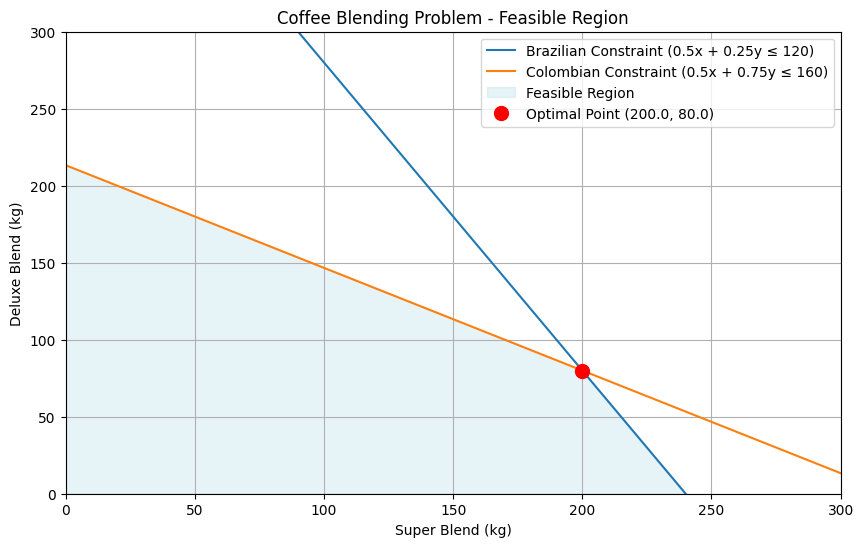

In [ ]:
# Install required packages (only needed first time)
!pip install pulp

import pulp
import matplotlib.pyplot as plt
import numpy as np

# Create the LP problem
prob = pulp.LpProblem("Coffee_Blending_Problem", pulp.LpMaximize)

# Decision variables
x = pulp.LpVariable("Super", lowBound=0, cat='Continuous')  # kg of Super blend
y = pulp.LpVariable("Deluxe", lowBound=0, cat='Continuous')  # kg of Deluxe blend

# Objective function (maximize profit in dollars)
prob += 0.20*x + 0.25*y, "Total Profit"

# Constraints
prob += 0.5*x + 0.25*y <= 120, "Brazilian Coffee Constraint"
prob += 0.5*x + 0.75*y <= 160, "Colombian Coffee Constraint"

# Solve the problem
prob.solve()

# Print results
print("Optimal Production:")
print(f"Super blend: {x.value():.2f} kg")
print(f"Deluxe blend: {y.value():.2f} kg")
print(f"Maximum Profit: ${pulp.value(prob.objective):.2f}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Define constraint lines
x_vals = np.linspace(0, 300, 100)
y_brazil = (120 - 0.5*x_vals)/0.25  # 0.5x + 0.25y ≤ 120
y_colombia = (160 - 0.5*x_vals)/0.75  # 0.5x + 0.75y ≤ 160

# Plot constraints
plt.plot(x_vals, y_brazil, label='Brazilian Constraint (0.5x + 0.25y ≤ 120)')
plt.plot(x_vals, y_colombia, label='Colombian Constraint (0.5x + 0.75y ≤ 160)')

# Highlight feasible region
y_feasible = np.minimum(y_brazil, y_colombia)
plt.fill_between(x_vals, 0, y_feasible, where=(y_feasible>=0), color='lightblue', alpha=0.3, label='Feasible Region')

# Plot optimal point
plt.plot(x.value(), y.value(), 'ro', markersize=10, label=f'Optimal Point ({x.value():.1f}, {y.value():.1f})')

# Labels and title
plt.xlabel('Super Blend (kg)')
plt.ylabel('Deluxe Blend (kg)')
plt.title('Coffee Blending Problem - Feasible Region')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.legend()
plt.grid(True)
plt.show()